<a href="https://colab.research.google.com/github/rekuantsun/PTDL-Python/blob/main/tkmt_do_an.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CHUẨN BỊ**

Thư viện cần thiết cho việc thống kê mô tả

In [71]:
import numpy as np
import pandas as pd
import random
from scipy import stats
from statsmodels.stats.weightstats import ztest
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Thiết lập hình ảnh

In [72]:
sns.set(rc={'figure.figsize':(13, 7.5)})
sns.set_context('talk')

Tắt cảnh báo scipy

In [73]:
warnings.filterwarnings('ignore')

Đọc và hiển thị file dữ liệu "Inc_Exp_Data.csv" từ Google Drive

In [74]:
from google.colab import drive
df = pd.read_csv('/content/drive/MyDrive/Học Lập Trình/Học kỳ 2/PTDL - Python /CODE/Đồ án/Inc_Exp_Data.csv')
df.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Mthly_HH_Income           50 non-null     int64 
 1   Mthly_HH_Expense          50 non-null     int64 
 2   No_of_Fly_Members         50 non-null     int64 
 3   Emi_or_Rent_Amt           50 non-null     int64 
 4   Annual_HH_Income          50 non-null     int64 
 5   Highest_Qualified_Member  50 non-null     object
 6   No_of_Earning_Members     50 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 2.9+ KB


### Gộp các cột dữ liệu định lượng vào một data_frame và đưa ra các giá trị thống kê

In [76]:
df_dl = pd.DataFrame(df,columns = ['Mthly_HH_Income','Mthly_HH_Expense','No_of_Fly_Members','Emi_or_Rent_Amt','Annual_HH_Income','No_of_Earning_Members'])
df_dl.describe()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
count,50.000000,50.000000,50.000000,50.000000,5.000000e+01,50.000000
mean,41558.000000,18818.000000,4.060000,3060.000000,4.900190e+05,1.460000
std,26097.908979,12090.216824,1.517382,6241.434948,3.201358e+05,0.734291
min,5000.000000,2000.000000,1.000000,0.000000,6.420000e+04,1.000000
25%,23550.000000,10000.000000,3.000000,0.000000,2.587500e+05,1.000000
50%,35000.000000,15500.000000,4.000000,0.000000,4.474200e+05,1.000000
75%,50375.000000,25000.000000,5.000000,3500.000000,5.947200e+05,2.000000
max,100000.000000,50000.000000,7.000000,35000.000000,1.404000e+06,4.000000


### Hệ số tương quan (Correlation coefficient)

In [77]:
corr = df_dl.corr(method='pearson')
corr

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
Mthly_HH_Income,1.000000,0.649215,0.448317,0.036976,0.970315,0.347883
Mthly_HH_Expense,0.649215,1.000000,0.639702,0.405280,0.591222,0.311915
No_of_Fly_Members,0.448317,0.639702,1.000000,0.085808,0.430868,0.597482
Emi_or_Rent_Amt,0.036976,0.405280,0.085808,1.000000,0.002716,-0.097431
Annual_HH_Income,0.970315,0.591222,0.430868,0.002716,1.000000,0.296679
No_of_Earning_Members,0.347883,0.311915,0.597482,-0.097431,0.296679,1.000000


### Hiệp phương sai (Covariance)

In [78]:
cov = df_dl.cov()
cov

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
Mthly_HH_Income,6.811009e+08,2.048465e+08,17753.591837,6.022980e+06,8.106864e+09,6666.653061
Mthly_HH_Expense,2.048465e+08,1.461733e+08,11735.632653,3.058257e+07,2.288330e+09,2769.102041
No_of_Fly_Members,1.775359e+04,1.173563e+04,2.302449,8.126531e+02,2.093019e+05,0.665714
Emi_or_Rent_Amt,6.022980e+06,3.058257e+07,812.653061,3.895551e+07,5.426263e+06,-446.530612
Annual_HH_Income,8.106864e+09,2.288330e+09,209301.854694,5.426263e+06,1.024869e+11,69741.266939
No_of_Earning_Members,6.666653e+03,2.769102e+03,0.665714,-4.465306e+02,6.974127e+04,0.539184


# **MÔ TẢ TRỰC QUAN HÓA DỮ LIỆU**

## **Định lượng**

### Biểu đồ boxplot các cột dữ liệu định lượng

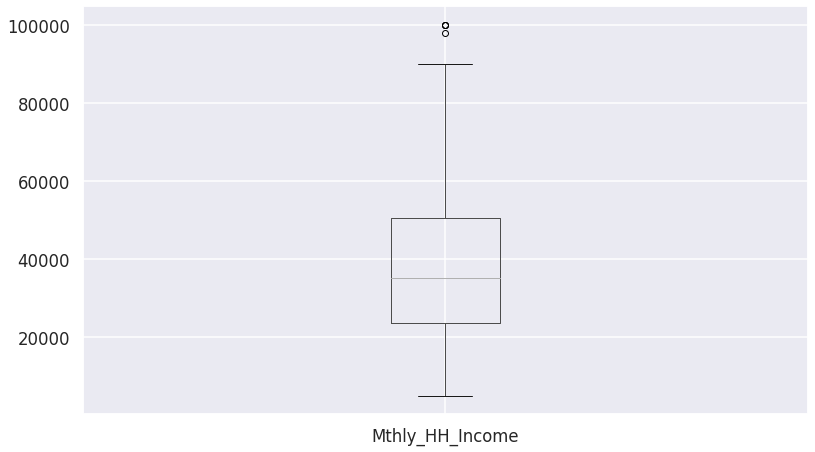

In [79]:
#biểu đồ boxplot cột Mthly_HH_Income
df.boxplot(column=['Mthly_HH_Income'])

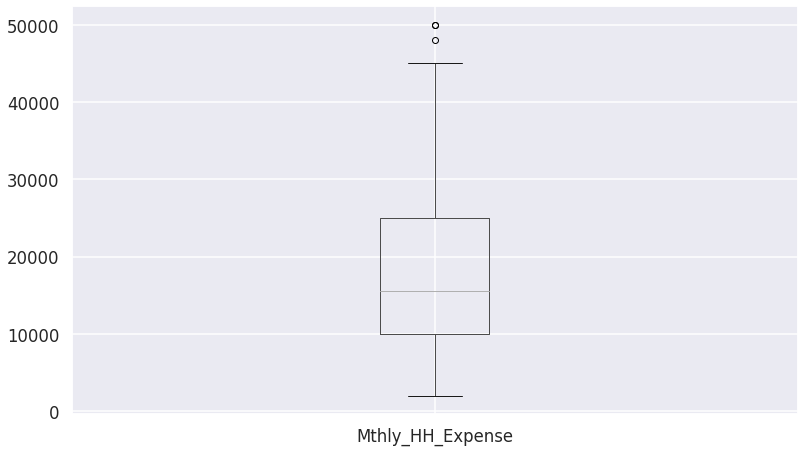

In [80]:
#biểu đồ boxplot cột Mthly_HH_Expense
df.boxplot(column=['Mthly_HH_Expense'])

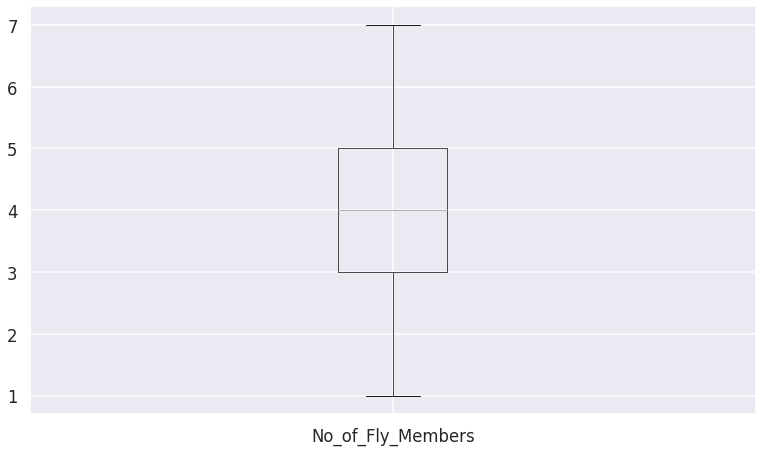

In [81]:
#biểu đồ boxplot cột No_of_Fly_Members
df.boxplot(column=['No_of_Fly_Members'])

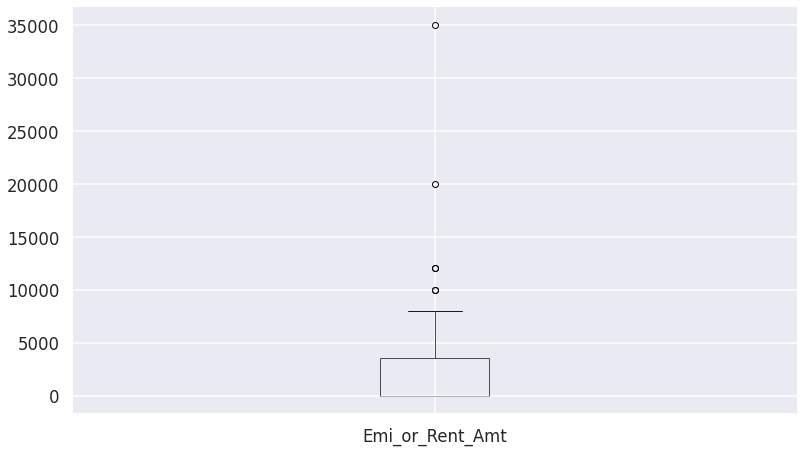

In [82]:
#biểu đồ boxplot cột Emi_or_Rent_Amt
df.boxplot(column=['Emi_or_Rent_Amt'])

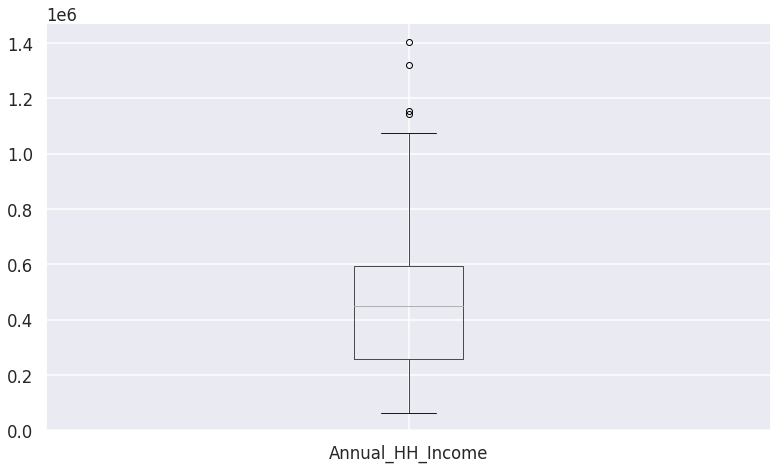

In [83]:
#biểu đồ boxplot cột Annual_HH_Income
df.boxplot(column=['Annual_HH_Income'])

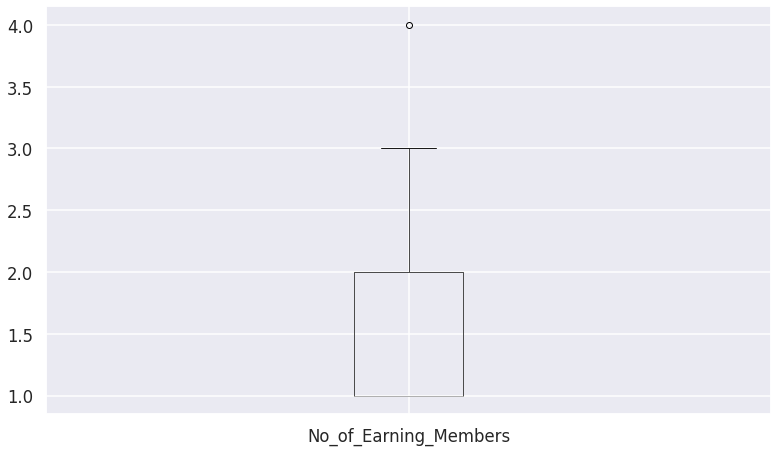

In [84]:
#biểu đồ boxplot cột No_of_Earning_Members
df.boxplot(column=['No_of_Earning_Members'])

### Biểu đồ scatterplot của các cột dữ liệu định lượng

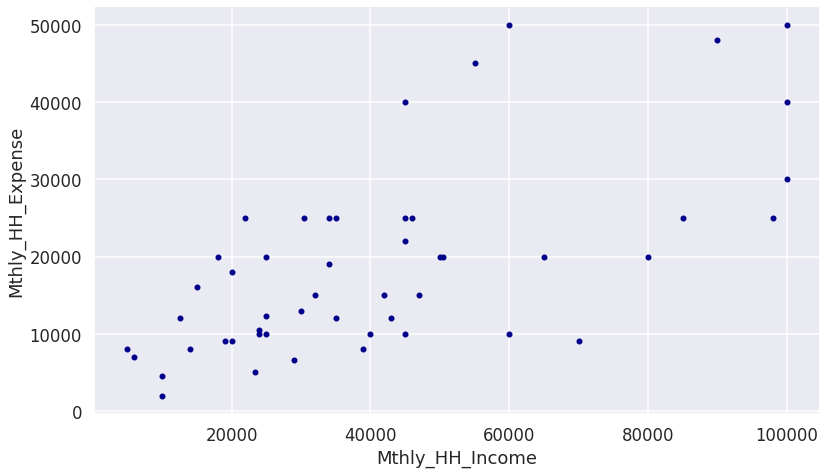

In [85]:
sc = df_dl.plot.scatter(x ='Mthly_HH_Income', y = 'Mthly_HH_Expense', c = 'DarkBlue')

### Biểu đồ nhiệt của các cột dữ liệu định lượng

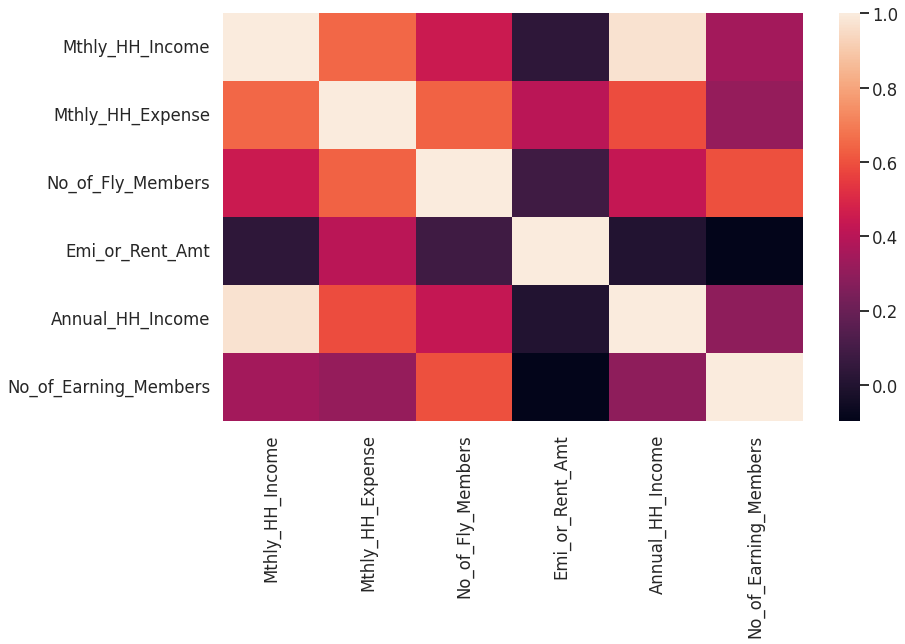

In [86]:
sns.heatmap(corr)

### Biểu đồ đường của các cột dữ liệu định lượng

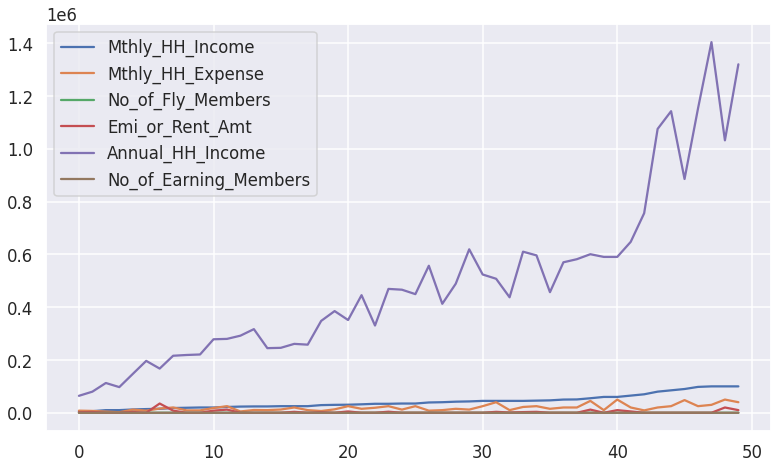

In [87]:
for cl in df_dl.columns:
  plt.plot(df_dl[cl],label = cl)
plt.legend() 
plt.show()

['Mthly_HH_Income','Mthly_HH_Expense','No_of_Fly_Members','Emi_or_Rent_Amt','Annual_HH_Income','No_of_Earning_Members']

### Biểu đồ histogram của các cột dữ liệu định lượng

Text(0.5, 1.0, 'Mthly_HH_Income')

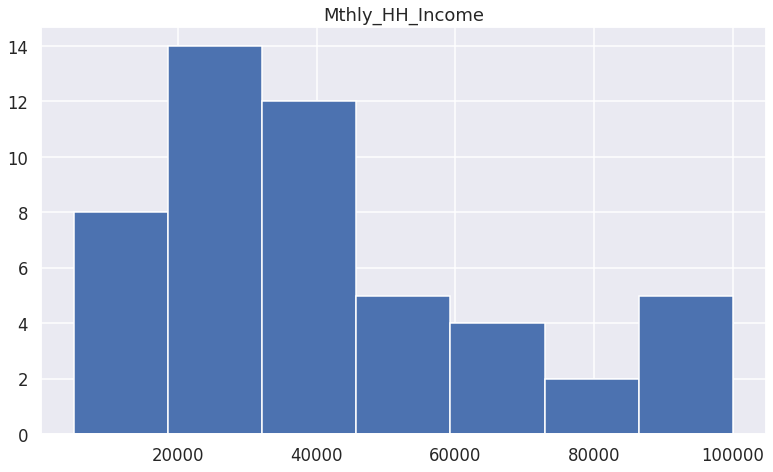

In [88]:
q25, q75 = np.percentile(df['Mthly_HH_Income'], [25, 75])
bin_width = 2 * (q75 - q25) * len(df['Mthly_HH_Income']) ** (-1/3)
bins = round((df['Mthly_HH_Income'].max() - df['Mthly_HH_Income'].min()) / bin_width)
plt.hist(df['Mthly_HH_Income'],bins=bins)
plt.title('Mthly_HH_Income')

Text(0.5, 1.0, 'Mthly_HH_Expense')

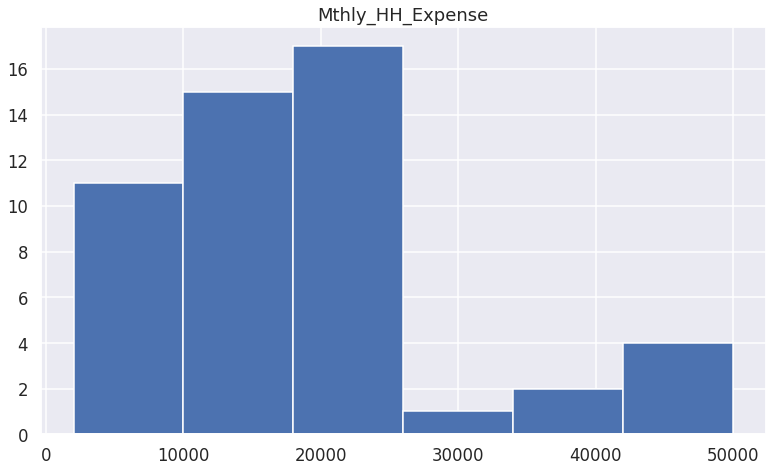

In [89]:
q25, q75 = np.percentile(df['Mthly_HH_Expense'], [25, 75])
bin_width = 2 * (q75 - q25) * len(df['Mthly_HH_Expense']) ** (-1/3)
bins = round((df['Mthly_HH_Expense'].max() - df['Mthly_HH_Expense'].min()) / bin_width)
plt.hist(df['Mthly_HH_Expense'],bins=bins)
plt.title('Mthly_HH_Expense')

Text(0.5, 1.0, 'No_of_Fly_Members')

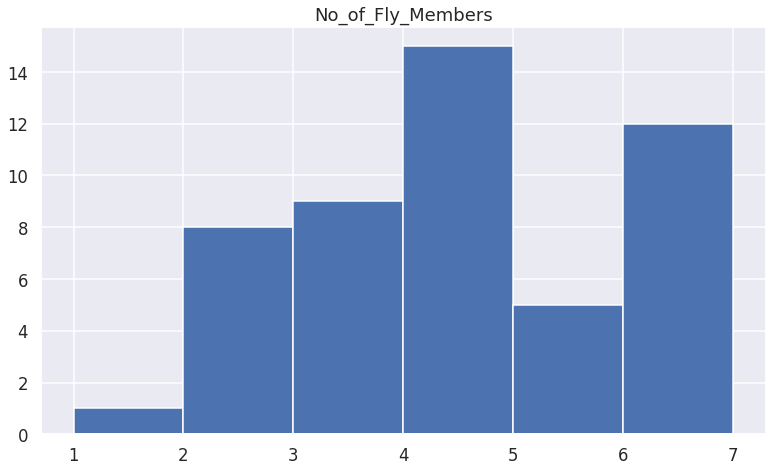

In [90]:
q25, q75 = np.percentile(df['No_of_Fly_Members'], [25, 75])
bin_width = 2 * (q75 - q25) * len(df['No_of_Fly_Members']) ** (-1/3)
bins = round((df['No_of_Fly_Members'].max() - df['No_of_Fly_Members'].min()) / bin_width)
plt.hist(df['No_of_Fly_Members'],bins=bins)
plt.title('No_of_Fly_Members')

Text(0.5, 1.0, 'Emi_or_Rent_Amt')

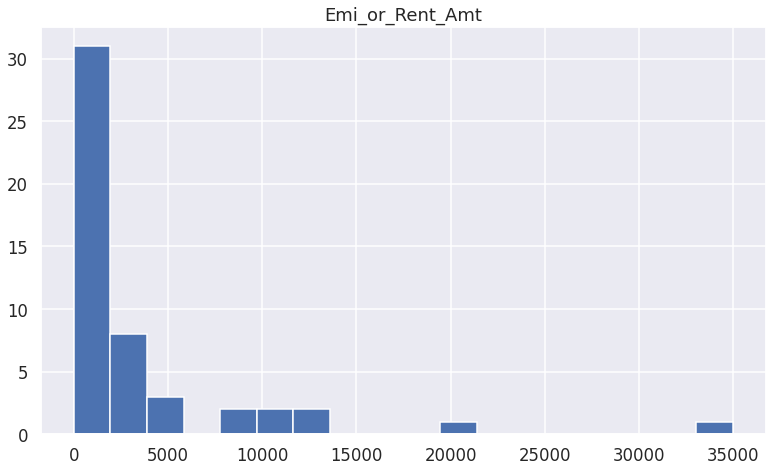

In [91]:
q25, q75 = np.percentile(df['Emi_or_Rent_Amt'], [25, 75])
bin_width = 2 * (q75 - q25) * len(df['Emi_or_Rent_Amt']) ** (-1/3)
bins = round((df['Emi_or_Rent_Amt'].max() - df['Emi_or_Rent_Amt'].min()) / bin_width)
plt.hist(df['Emi_or_Rent_Amt'],bins=bins)
plt.title('Emi_or_Rent_Amt')

Text(0.5, 1.0, 'Annual_HH_Income')

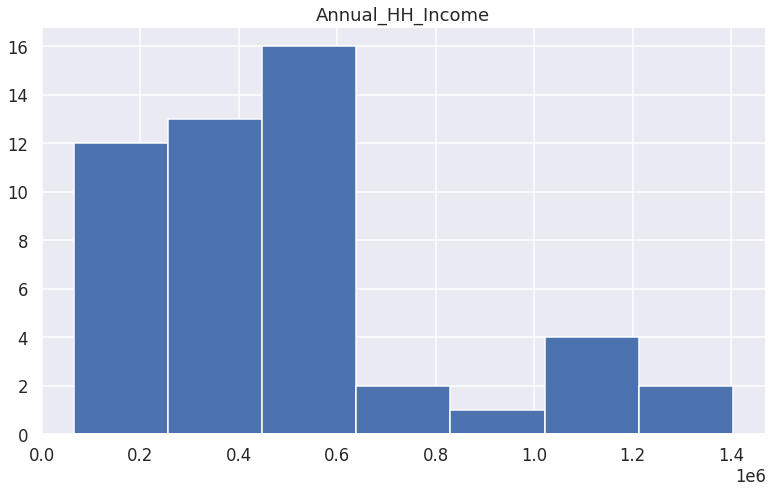

In [92]:
q25, q75 = np.percentile(df['Annual_HH_Income'], [25, 75])
bin_width = 2 * (q75 - q25) * len(df['Annual_HH_Income']) ** (-1/3)
bins = round((df['Annual_HH_Income'].max() - df['Annual_HH_Income'].min()) / bin_width)
plt.hist(df['Annual_HH_Income'],bins=bins)
plt.title('Annual_HH_Income')

Text(0.5, 1.0, 'No_of_Earning_Members')

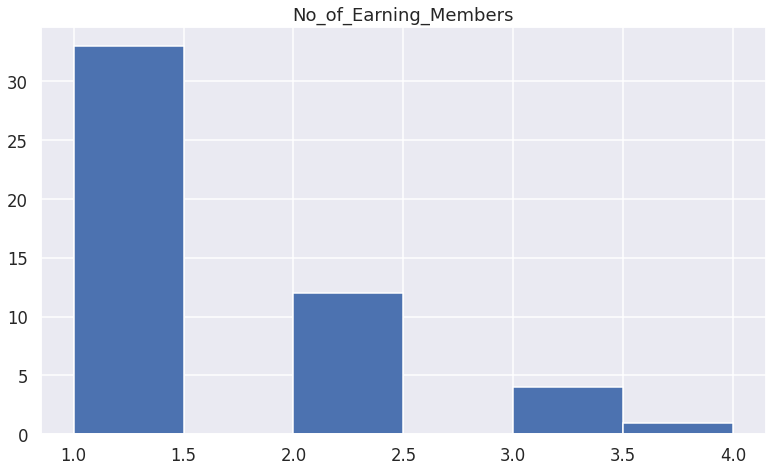

In [93]:
q25, q75 = np.percentile(df['No_of_Earning_Members'], [25, 75])
bin_width = 2 * (q75 - q25) * len(df['No_of_Earning_Members']) ** (-1/3)
bins = round((df['No_of_Earning_Members'].max() - df['No_of_Earning_Members'].min()) / bin_width)
plt.hist(df['No_of_Earning_Members'],bins=bins)
plt.title('No_of_Earning_Members')

##Biểu đồ cặp các cột dữ liệu định lượng

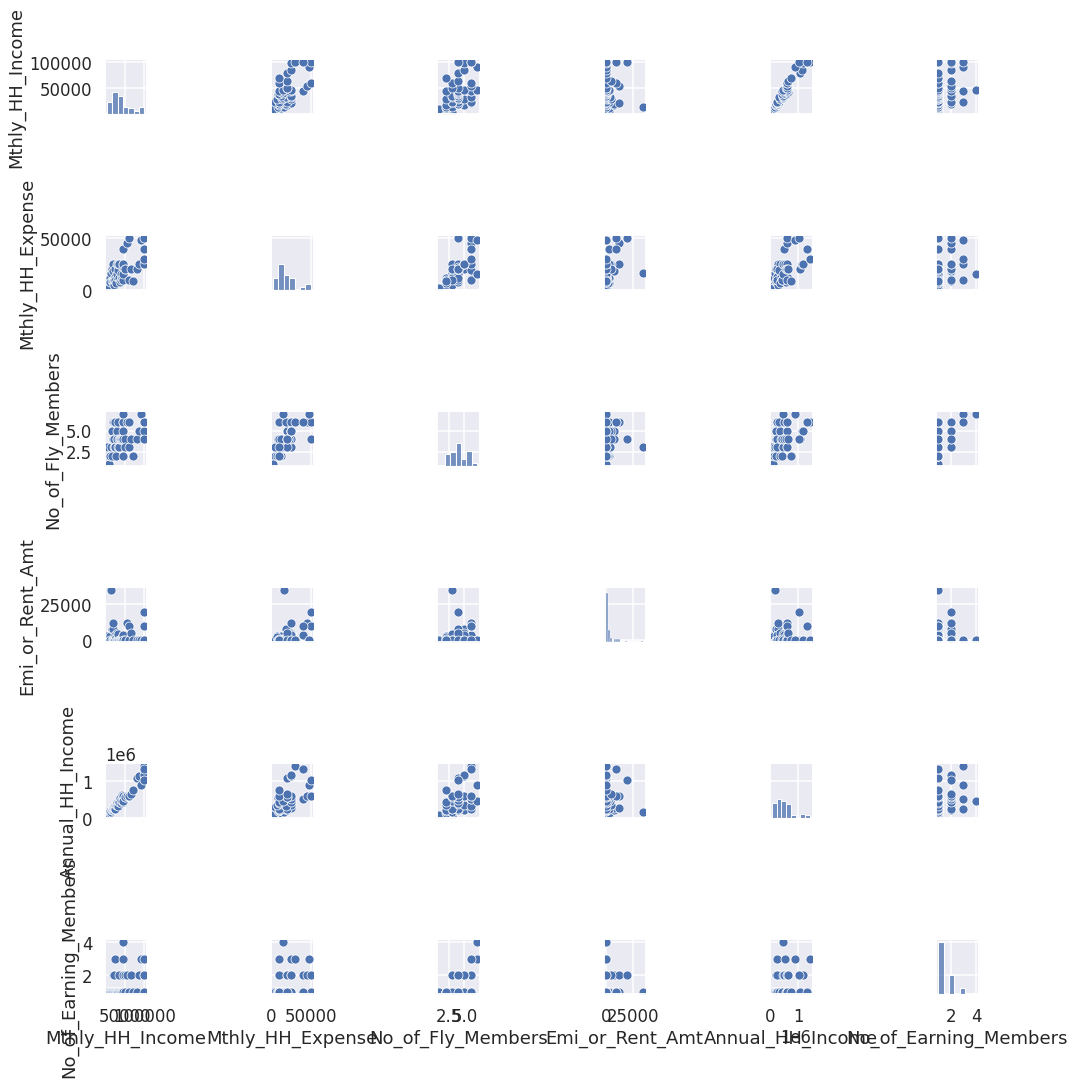

In [95]:
sns.pairplot(df_dl)

## **Định tính**